In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from MieTFNew import *
import random
from MiePy import EnsemblePhaseFunctions

2022-05-10 14:11:10.448036: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/user/ponts_m/pythonenv/lib:
2022-05-10 14:11:10.448075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-10 14:11:13.642567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/user/ponts_m/pythonenv/lib:
2022-05-10 14:11:13.642611: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-10 14:11:13.642644: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (merlin-c-214.psi.c

## Read in Grasp Open Data

In [2]:
Parameters = pd.read_csv('/data/user/ponts_m/aerosol/aerosol_data/raw_data/GRASP_LHS_rand_paremeters.csv')

PhaseFunction = pd.read_csv('/data/user/ponts_m/aerosol/aerosol_data/raw_data/ML_simulated_scat_data.csv')

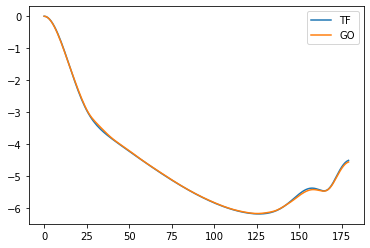

mean and std:  0.018506697600196013  +-  0.024295947475207653
random number was:  3460
m:  tf.Tensor((1.5541643331860653+0.0346836870346249j), shape=(), dtype=complex128)
Vtot:  tf.Tensor(2393.715746145333, shape=(), dtype=float64)
rmean:  tf.Tensor(674.6965560403047, shape=(), dtype=float64)
sigma:  tf.Tensor(1.449153146573409, shape=(), dtype=float64)


In [3]:
location = random.randint(1,10000)
#location = 91

Vtot = Parameters['V_tot']
Rmedian = Parameters['R_median']
GSD = Parameters['GSD']
n450 = Parameters['n_450nm']
n532 = Parameters['n_532nm']
n630 = Parameters['n_630nm']
k450 = Parameters['k_450nm']
k532 = Parameters['k_532nm']
k630 = Parameters['k_630nm']

Vtotarray = Vtot.to_numpy()
Rmedianarray = Rmedian.to_numpy()
GSDarray = GSD.to_numpy()
n450array = n450.to_numpy()
n532array = n532.to_numpy()
n630array = n630.to_numpy()
k450array = k450.to_numpy()
k532array = k532.to_numpy()
k630array = k630.to_numpy()

PhaseFunction1 = PhaseFunction.loc[location,:].to_numpy()
P11_450 = PhaseFunction1[0:180]
P11_532 = PhaseFunction1[180:360]
P11_630 = PhaseFunction1[360:540]
P12_450 = PhaseFunction1[540:720]
P12_532 = PhaseFunction1[720:900]
P12_630 = PhaseFunction1[900:1080]

m = tf.constant(n532[location] + k532[location]*1j)
Vtot = tf.constant(Vtotarray[location])
rmean = tf.constant(Rmedianarray[location]*1000)
sigma = tf.constant(GSDarray[location])
wavelength = 532

scattering_angle = np.arange(180)

EnsembleFct = get_TFEnsembleP11()
P11 = EnsembleFct(m, Vtot, sigma, rmean)

plt.figure()
plt.plot(scattering_angle, np.log(P11/max(P11)), label='TF')
plt.plot(scattering_angle, np.log(P11_532/max(P11_532)), label='GO')
plt.legend()
plt.show()

print('mean and std: ', np.mean(np.abs((P11/max(P11)-P11_532/max(P11_532))/(P11_532/max(P11_532)))), ' +- ', np.std((P11/max(P11)-P11_532/max(P11_532))/(P11_532/max(P11_532))))
print('random number was: ', location)
print('m: ', m)
print('Vtot: ', Vtot)
print('rmean: ', rmean)
print('sigma: ', sigma)

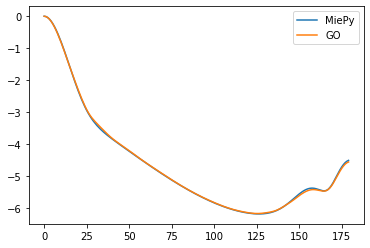

In [4]:
m1 = np.array([m])
Vtot1 = np.array([Vtot])
sigma1 = np.array([sigma])
rmean1 = np.array([rmean])

P11, PPF = EnsemblePhaseFunctions(m1, wavelength, Vtot1, sigma1, rmean1)

plt.figure()
plt.plot(scattering_angle, np.log(P11/max(P11)), label='MiePy')
plt.plot(scattering_angle, np.log(P11_532/max(P11_532)), label='GO')
plt.legend()
#plt.savefig('GOComparison.svg')
plt.show()
#plt.savefig('GOComparison5.svg')

## Make Plot with two y axes to display the relative error as well

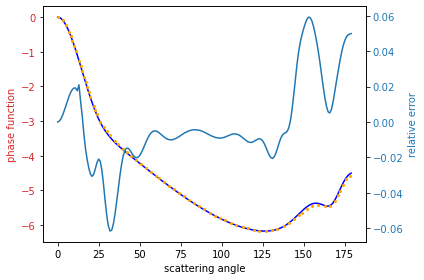

In [11]:
relerror = (P11[:,0]/max(P11[:,0])-P11_532/max(P11_532))/(P11_532/max(P11_532))
angle = np.arange(180)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('scattering angle')
ax1.set_ylabel('phase function', color=color)
ax1.plot(scattering_angle, np.log(P11/max(P11)), label='MiePy', color='blue')
ax1.plot(scattering_angle, np.log(P11_532/max(P11_532)),'o', markevery=0.015,ms=2, label='GO', color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('relative error', color=color)  # we already handled the x-label with ax1
ax2.plot(angle, relerror, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
plt.figure()
plt.plot(scattering_angle, np.log(P11_1/max(P11_1)), label='MiePy', color='blue')
plt.plot(scattering_angle, np.log(GO_1/max(GO_1)),'o', markevery=0.015,ms=2, label='GO', color='orange')
plt.plot(scattering_angle, np.log(P11_2/max(P11_2)), color='blue')
plt.plot(scattering_angle, np.log(GO_2/max(GO_2)),'o', markevery=0.015,ms=2, color='orange')
plt.plot(scattering_angle, np.log(P11_3/max(P11_3)), color='blue')
plt.plot(scattering_angle, np.log(GO_3/max(GO_3)),'o', markevery=0.015,ms=2, color='orange')
plt.plot(scattering_angle, np.log(P11_4/max(P11_4)), color='blue')
plt.plot(scattering_angle, np.log(GO_4/max(GO_4)),'o', markevery=0.015,ms=2, color='orange')
plt.legend()
#plt.savefig('GOComparison2.svg')

NameError: name 'P11_1' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
location = 35 #51

Vtot = Parameters['V_tot']
Rmedian = Parameters['R_median']
GSD = Parameters['GSD']
n450 = Parameters['n_450nm']
n532 = Parameters['n_532nm']
n630 = Parameters['n_630nm']
k450 = Parameters['k_450nm']
k532 = Parameters['k_532nm']
k630 = Parameters['k_630nm']

Vtotarray = Vtot.to_numpy()
Rmedianarray = Rmedian.to_numpy()
GSDarray = GSD.to_numpy()
n450array = n450.to_numpy()
n532array = n532.to_numpy()
n630array = n630.to_numpy()
k450array = k450.to_numpy()
k532array = k532.to_numpy()
k630array = k630.to_numpy()

PhaseFunction1 = PhaseFunction.loc[location,:].to_numpy()
P11_450 = PhaseFunction1[0:180]
P11_532 = PhaseFunction1[180:360]
P11_630 = PhaseFunction1[360:540]
P12_450 = PhaseFunction1[540:720]
P12_532 = PhaseFunction1[720:900]
P12_630 = PhaseFunction1[900:1080]

m = tf.constant(n532[location] + k532[location]*1j)
Vtot = tf.constant(Vtotarray[location])
rmean = tf.constant(Rmedianarray[location]*1000)
sigma = tf.constant(GSDarray[location])
wavelength = 532

scattering_angle = np.arange(180)

EnsembleFct = get_TFEnsembleP11()
P11 = EnsembleFct(m, Vtot, sigma, rmean)

plt.figure()
plt.plot(scattering_angle, np.log(P11/max(P11)), label='TF')
plt.plot(scattering_angle, np.log(P11_532/max(P11_532)), label='GO')
plt.legend()
plt.show()
    
print('mean and std: ', np.mean(np.abs((P11/max(P11)-P11_532/max(P11_532))/(P11_532/max(P11_532)))), ' +- ', np.std((P11/max(P11)-P11_532/max(P11_532))/(P11_532/max(P11_532))))
print('random number was: ', location)
print('m: ', m)
print('Vtot: ', Vtot)
print('rmean: ', rmean)
print('sigma: ', sigma)